In [5]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

根据带有噪声的线性模型构造一个人造数据集。 我们使用线性模型参数w=[2,−3.4]⊤
、b=4.2
和噪声项ϵ
生成数据集及其标签：

y=Xw+b+ϵ

In [6]:
def synthetic_data(w, b, num_examples):
    """生成 y = Xw + b + 噪声。"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

features 中的每一行都包含一个二维数据样本，labels 中的每一行都包含一维标签值（一个标量）

In [7]:
print('features:', features[0], '\nlabel:', labels[0])

features: tensor([1.1343, 0.1370]) 
label: tensor([6.0083])


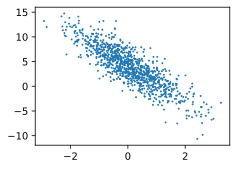

In [8]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(),
                labels.detach().numpy(), 1);

定义一个data_iter 函数， 该函数接收批量大小、特征矩阵和标签向量作为输入，生成大小为batch_size的小批量

In [9]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i +
                                                   batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.0518, -0.1340],
        [-0.6444,  0.2003],
        [ 1.2900,  0.0179],
        [-1.5136,  0.5027],
        [-0.4340,  1.8439],
        [-0.3914,  1.5149],
        [-0.7414,  0.7328],
        [ 0.6584, -0.3008],
        [ 0.3272,  0.1943],
        [ 0.9455,  0.3904]]) 
 tensor([[ 4.7636],
        [ 2.2178],
        [ 6.7214],
        [-0.5417],
        [-2.9506],
        [-1.7339],
        [ 0.2263],
        [ 6.5390],
        [ 4.1777],
        [ 4.7545]])


定义 初始化模型参数



In [10]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

定义模型

In [11]:
def linreg(X, w, b):
    """线性回归模型。"""
    return torch.matmul(X, w) + b

定义损失函数

In [12]:
def squared_loss(y_hat, y):
    """均方损失。"""
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

定义优化算法



In [13]:
def sgd(params, lr, batch_size):
    """小批量随机梯度下降。"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

训练过程



In [14]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.055460
epoch 2, loss 0.000266
epoch 3, loss 0.000051


比较真实参数和通过训练学到的参数来评估训练的成功程度

In [15]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([-9.2745e-05, -1.1122e-03], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0008], grad_fn=<RsubBackward1>)
